## 1. Load dataset

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus 
from kmodes.kprototypes import KPrototypes
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


In [215]:
url = 'https://raw.githubusercontent.com/aavasna/csv_data/main/Customer-Churn.csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Data Understanding and Data Preparation

### 2.0 Overview Data and Column Formatting

In [216]:
df.shape

(7043, 21)

In [217]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [218]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

##### Convert all columns to lowercase

In [219]:
df.columns = df.columns.str.lower()
df.columns
original_df = pd.DataFrame()
original_df = df.copy()


### 2.1 Convert Total Charges from Object to Float



In [220]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')


In [221]:
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### 2.2 Checking for Missing Values

In [222]:
df.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

#### 2.3.1 Fix missing values in Total Charges

`Missing values make up for 11/7032 records.` So fill missing values with total charges mean.

In [223]:
df.totalcharges.fillna(df.totalcharges.mean(), inplace=True)


### 2.3 Checking Class Imbalance

In [224]:
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64



### 2.4 General EDA

#### 2.4.1 Label: Churn

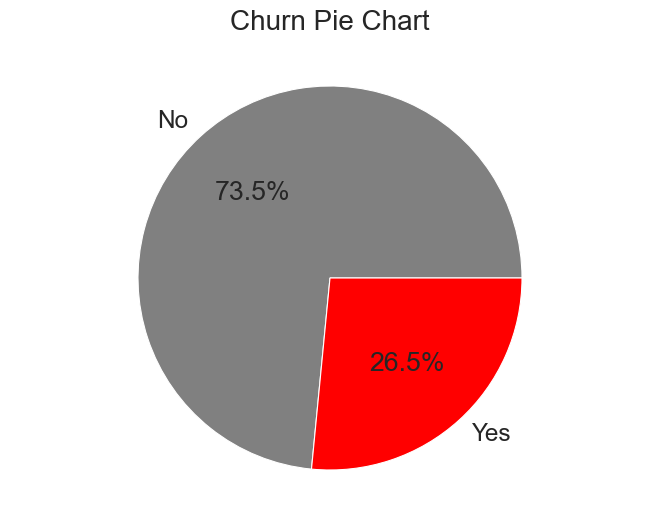

In [225]:
sns.set(style='whitegrid')
sns.set_context('paper', font_scale = 2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
churn = df.churn.value_counts()
ax.pie(churn, labels=labels, autopct='%1.1f%%', colors=['grey', 'red'])
plt.title("Churn Pie Chart", fontsize=20)
plt.show()

In [226]:
list(df)

['customerid',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'monthlycharges',
 'totalcharges',
 'churn']

#### 2.4.2 Churn vs. Other Features

C:\Users\nzund\AppData\Local\Temp\ipykernel_14008\2587586257.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.countplot(data=df, x='gender', hue='churn', ax=ax[0][0], color='red')
C:\Users\nzund\AppData\Local\Temp\ipykernel_14008\2587586257.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.countplot(data=df, x='partner', hue='churn', ax=ax[0][1], color='red')
C:\Users\nzund\AppData\Local\Temp\ipykernel_14008\2587586257.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.countplot(data=df, x='dependents', hue='churn', ax=ax[0][2], color='red')
C:\Users\nzund\AppData\Local\Temp\ipykernel_14008\2587586257.py:7: FutureWarning: 

Setting a gradient palette using

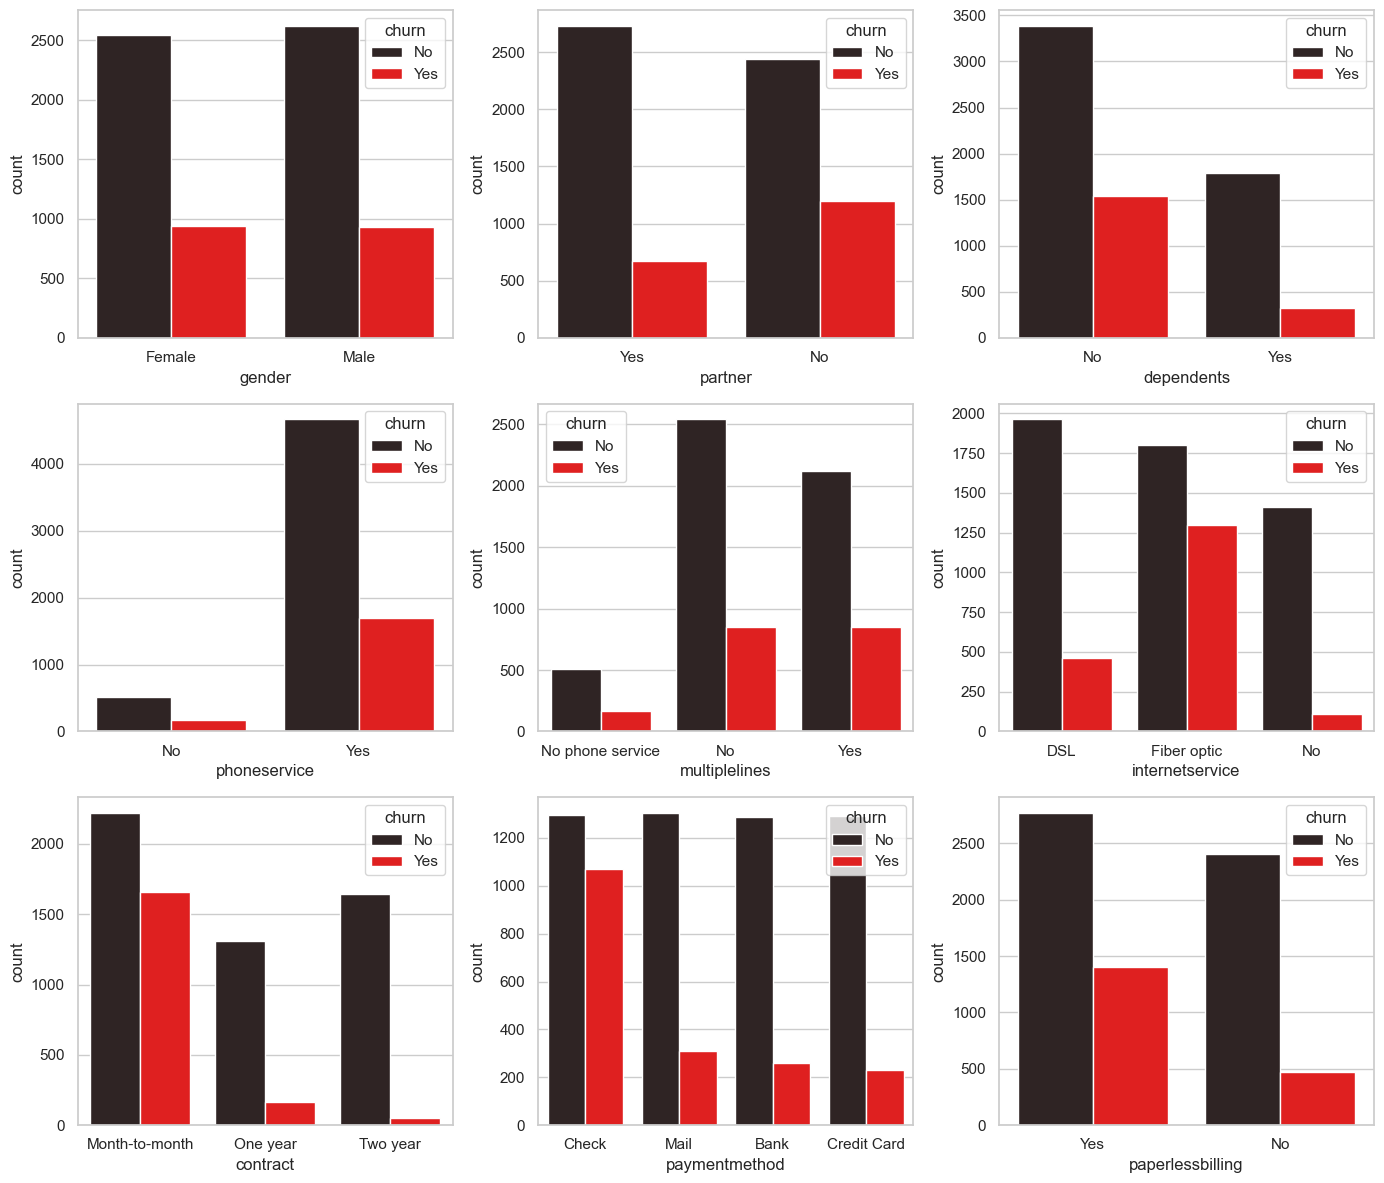

In [227]:

sns.set(style='whitegrid')

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df, x='gender', hue='churn', ax=ax[0][0], color='red')
sns.countplot(data=df, x='partner', hue='churn', ax=ax[0][1], color='red')
sns.countplot(data=df, x='dependents', hue='churn', ax=ax[0][2], color='red')
sns.countplot(data=df, x='phoneservice', hue='churn', ax=ax[1][0], color='red')
sns.countplot(data=df, x='multiplelines', hue='churn', ax=ax[1][1], color='red')
sns.countplot(data=df, x='internetservice', hue='churn', ax=ax[1][2], color='red')
sns.countplot(data=df, x='contract', hue='churn', ax=ax[2][0], color='red')
sns.countplot(data=df, x='paymentmethod', hue='churn', ax=ax[2][1], color='red')
new_labels = ['Check', 'Mail', 'Bank', 'Credit Card']
ax[2][1].set_xticklabels(new_labels)
sns.countplot(data=df, x='paperlessbilling', hue='churn', ax=ax[2][2], color='red')

plt.tight_layout()
plt.show()

#### 2.4.3 KDE

##### 2.4.3.1 Monthly Charges vs Charge Amount

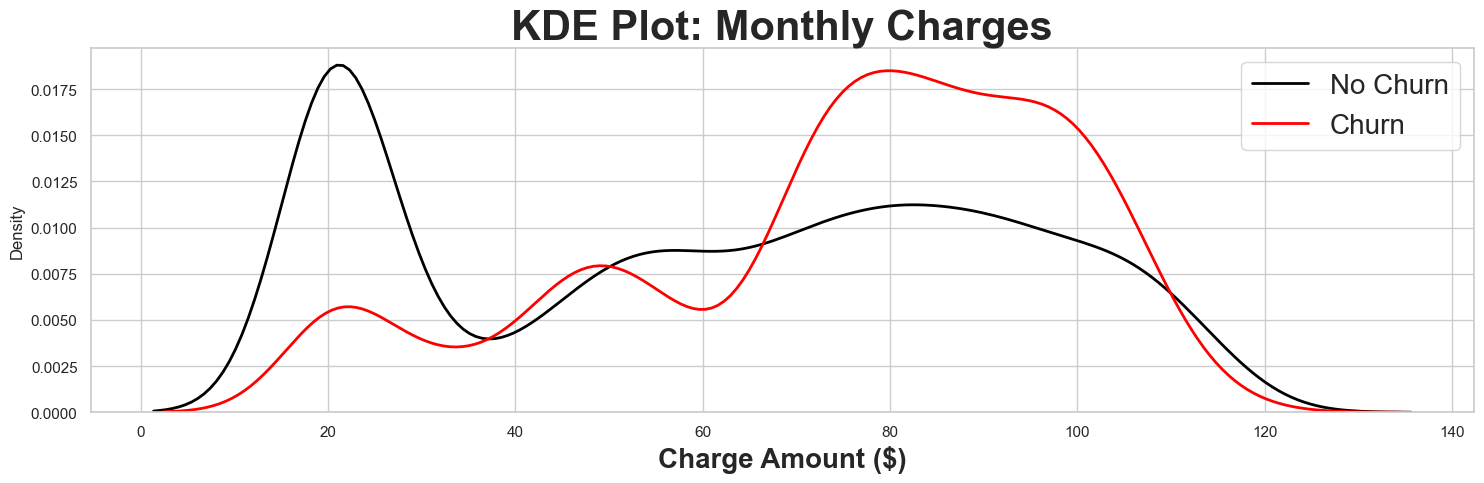

In [205]:
plt.figure(figsize = (15, 5))
plt.title("KDE Plot: Monthly Charges", fontsize = 30, fontweight = 'bold')
ax = sns.kdeplot(df[df.churn == 'No']["monthlycharges"].dropna(), label = 'No Churn', lw = 2, legend = True, color = 'black')
ax1 = sns.kdeplot(df[df.churn == 'Yes']["monthlycharges"].dropna(), label = 'Churn', lw = 2, legend = True, color = 'red')
plt.xlabel('Charge Amount ($)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize = 20, loc = 'upper right')
plt.tight_layout()

##### 2.4.3.2 Total Charges vs Charge Amount

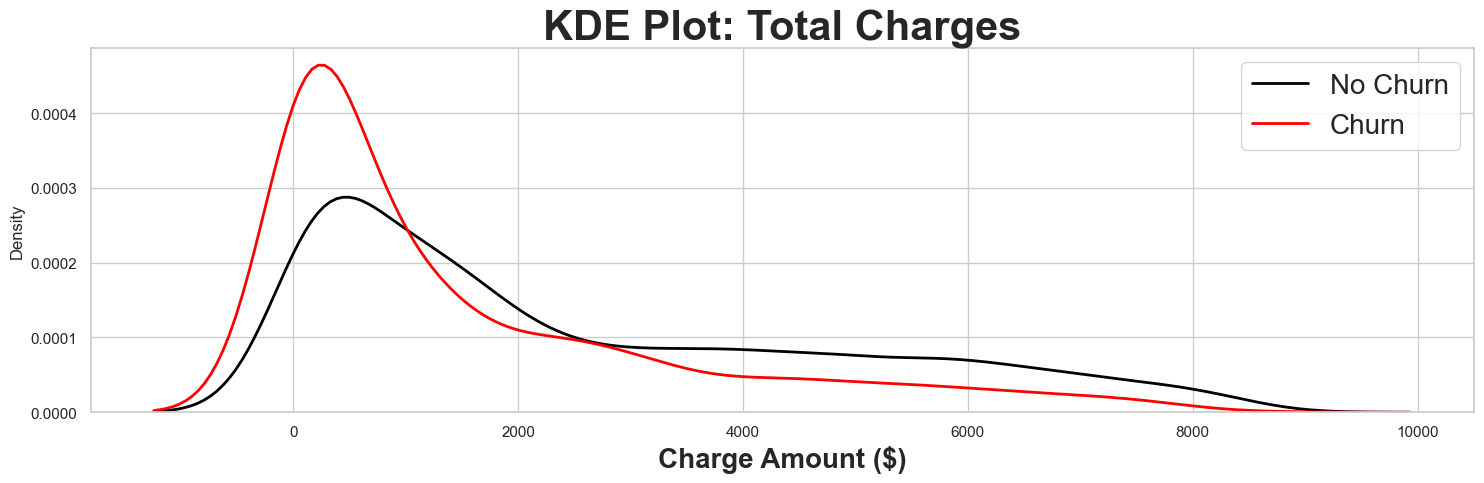

In [206]:
plt.figure(figsize = (15, 5))
plt.title("KDE Plot: Total Charges", fontsize = 30, fontweight = 'bold')
ax = sns.kdeplot(df[df.churn == 'No']["totalcharges"].dropna(), label = 'No Churn', lw = 2, legend = True, color='black')
ax1 = sns.kdeplot(df[df.churn == 'Yes']["totalcharges"].dropna(), label = 'Churn', lw = 2, legend = True, color='red')
plt.xlabel('Charge Amount ($)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize = 20, loc = 'upper right')
plt.tight_layout()

##### 2.4.3.3 Tenure Distribution

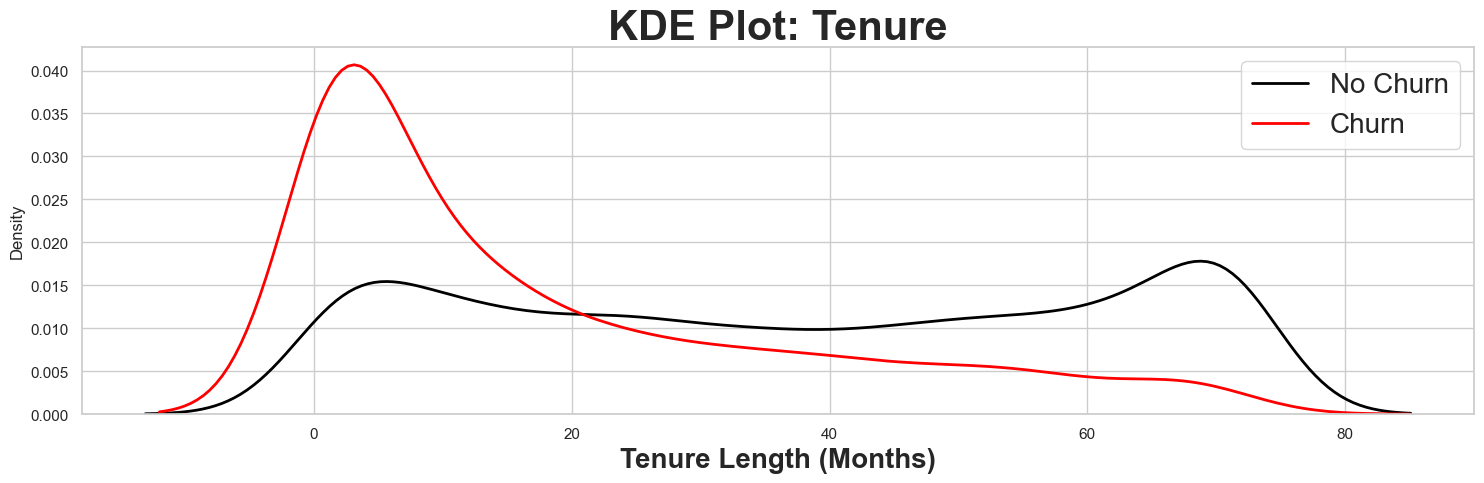

In [207]:
plt.figure(figsize = (15, 5))
plt.title("KDE Plot: Tenure", fontsize = 30, fontweight = 'bold')
ax = sns.kdeplot(df[df.churn == 'No']["tenure"].dropna(), label = 'No Churn', lw = 2, legend = True, color = 'black')
ax1 = sns.kdeplot(df[df.churn == 'Yes']["tenure"].dropna(), label = 'Churn', lw = 2, legend = True, color = 'red')
feature = "tenure"
if feature == 'tenure':
    plt.xlabel('Tenure Length (Months)', fontsize = 20, fontweight = 'bold')
else:
    plt.xlabel('Charge Amount ($)', fontsize = 20, fontweight = 'bold')
plt.legend(fontsize = 20, loc = 'upper right')
plt.tight_layout()

#### 2.4.3.1 Monthly Charges vs Charge Amount

### 2.5 One Hot Encoding Transformation

One-Hot Encoding - Columns with Variables > 2

In [208]:
# dummies = pd.get_dummies(df.PaymentMethod)
# df[dummies.columns] = dummies

#multiple lines
ML_dummies = pd.get_dummies(df.multiplelines, prefix = "ml", prefix_sep='_', drop_first=False)
df[ML_dummies.columns] = ML_dummies
df.drop(['multiplelines'],axis=1,inplace=True)

#internet service
IS_dummies = pd.get_dummies(df.internetservice, prefix = "is", prefix_sep='_', drop_first=False)
df[IS_dummies.columns] = IS_dummies
df.drop(['internetservice'],axis=1,inplace=True)

#online security
OS_dummies = pd.get_dummies(df.onlinesecurity, prefix = "os", prefix_sep='_', drop_first=False)
df[OS_dummies.columns] = OS_dummies
df.drop(['onlinesecurity'],axis=1,inplace=True)

#device protection
DP_dummies = pd.get_dummies(df.deviceprotection, prefix = "dp", prefix_sep='_', drop_first=False)
df[DP_dummies.columns] = DP_dummies
df.drop(['deviceprotection'],axis=1,inplace=True)

#tech support
TS_dummies = pd.get_dummies(df.techsupport, prefix = "ts", prefix_sep='_', drop_first=False)
df[TS_dummies.columns] = TS_dummies
df.drop(['techsupport'],axis=1,inplace=True)

#streaming TV
ST_dummies = pd.get_dummies(df.streamingtv, prefix = "st", prefix_sep='_', drop_first=False)
df[ST_dummies.columns] = ST_dummies
df.drop(['streamingtv'],axis=1,inplace=True)

#streaming movies
SM_dummies = pd.get_dummies(df.streamingmovies, prefix = "sm", prefix_sep='_', drop_first=False)
df[SM_dummies.columns] = SM_dummies
df.drop(['streamingmovies'],axis=1,inplace=True)

#contract
C_dummies = pd.get_dummies(df.contract, prefix = "c", prefix_sep='_', drop_first=False)
df[C_dummies.columns] = C_dummies
df.drop(['contract'],axis=1,inplace=True)

#payment method
PM_dummies = pd.get_dummies(df.paymentmethod, prefix = "pm", prefix_sep='_', drop_first=False)
df[PM_dummies.columns] = PM_dummies
df.drop(['paymentmethod'],axis=1,inplace=True)

One Hot Encoding - 2 Variable Columns

In [209]:
from sklearn import preprocessing

# binary one-hot encoding for gender column
le = preprocessing.LabelEncoder()
gender_vals = df['gender'].values
le.fit(gender_vals)
df['gender'] = le.transform(gender_vals)

# binary one-hot encoding for Partner column
le = preprocessing.LabelEncoder()
partner_vals = df['partner'].values
le.fit(partner_vals)
df['partner'] = le.transform(partner_vals)

# binary one-hot encoding for Dependents column
le = preprocessing.LabelEncoder()
dep_vals = df['dependents'].values
le.fit(dep_vals)
df['dependents'] = le.transform(dep_vals)

# binary one-hot encoding for PhoneService column
le = preprocessing.LabelEncoder()
ps_vals = df['phoneservice'].values
le.fit(ps_vals)
df['phoneservice'] = le.transform(ps_vals)

df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinebackup,paperlessbilling,monthlycharges,...,sm_No,sm_No internet service,sm_Yes,c_Month-to-month,c_One year,c_Two year,pm_Bank transfer (automatic),pm_Credit card (automatic),pm_Electronic check,pm_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,Yes,Yes,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,No,No,56.95,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,Yes,Yes,53.85,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,No,No,42.30,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,No,Yes,70.70,...,1,0,0,1,0,0,0,0,1,0


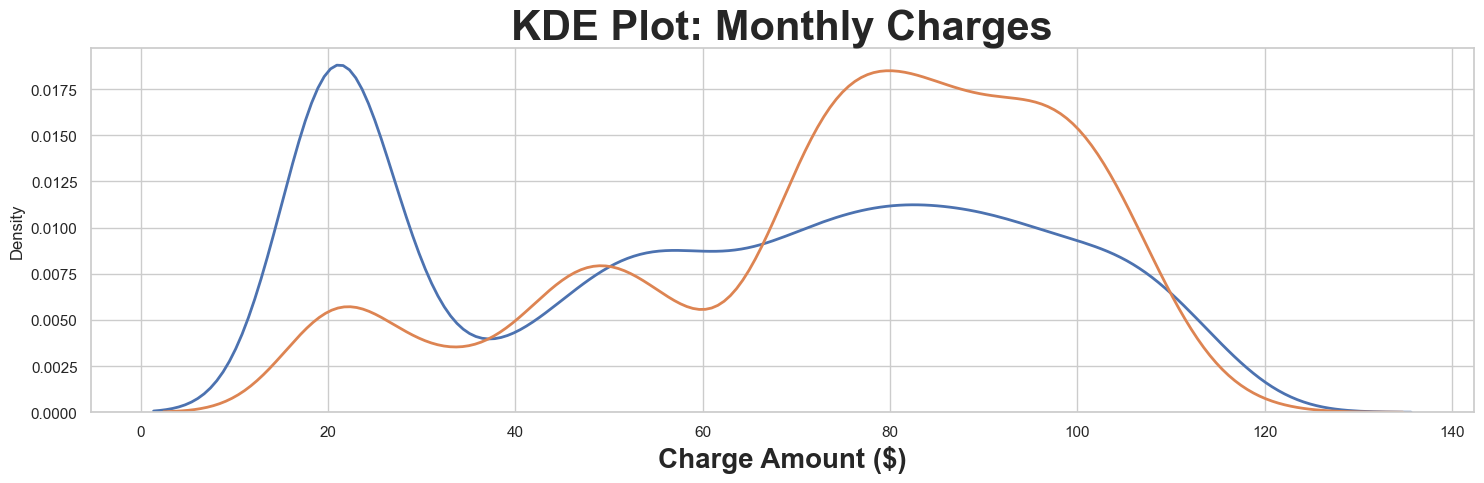

In [210]:
plt.figure(figsize = (15, 5))
plt.title("KDE Plot: Monthly Charges", fontsize = 30, fontweight = 'bold')
ax = sns.kdeplot(df[df.churn == 'No']["monthlycharges"].dropna(), label = 'No Churn', lw = 2, legend = True)
ax1 = sns.kdeplot(df[df.churn == 'Yes']["monthlycharges"].dropna(), label = 'Churn', lw = 2, legend = True)
feature = "monthlycharges"
if feature == 'tenure':
    plt.xlabel('Tenure Length (Months)', fontsize = 20, fontweight = 'bold')
else:
    plt.xlabel('Charge Amount ($)', fontsize = 20, fontweight = 'bold')
plt.tight_layout()

### 2.6 Correlation Analysis

In [ ]:
target_variable = 'churn'
df.churn = pd.factorize(df.churn)[0]
corr_with_target = df.corr()[target_variable].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title(f'Feature Correlation with {target_variable}')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()


## 3 Modelling

### 3.1 KNN - Classification

Implement KNN Machine Learning model to classify customer telco data

In [24]:
ml_df = pd.DataFrame()
ml_df = df.copy()

In [25]:
ml_df["churn"] = pd.factorize(ml_df["churn"])[0]
ml_df["onlinebackup"] = pd.factorize(ml_df["onlinebackup"])[0]
ml_df["paperlessbilling"] = pd.factorize(ml_df["paperlessbilling"])[0]

In [26]:
ml_df.drop(["customerid"], axis=1, inplace=True)

In [27]:
y = df["churn"]
ml_df.drop(["churn"], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(
    ml_df, y, test_size=0.3, random_state=1234
)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=70)

tree.fit(X_train, y_train)

# for kNN, we need to scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_test)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=70)

In [28]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

tree_pred = tree.predict(X_test)
accuracy_score(y_test, tree_pred)  

0.7841930903928065

In [29]:
knn_pred = knn.predict(X_holdout_scaled)
accuracy_score(y_test, knn_pred)  

0.7761476573592049

In [87]:

tree_params = {"max_depth": range(1, 100), "max_features": range(5, 50)}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4455 candidates, totalling 22275 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 100),
                         'max_features': range(5, 50)},
             verbose=True)

In [91]:
tree_grid.best_params_

{'max_depth': 5, 'max_features': 22}

In [90]:
tree_grid.best_score_

0.8010141987829614

In [92]:

accuracy = accuracy_score(tree_grid.predict(X_test), y_test)
precision = precision_score(y_test, tree_grid.predict(X_test))
recall = recall_score(y_test, tree_grid.predict(X_test))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7856128726928537
Precision: 0.6272965879265092
Recall: 0.43454545454545457


In [93]:
model = DecisionTreeClassifier(
    max_depth=tree_grid.best_estimator_.max_depth,
    min_samples_leaf=tree_grid.best_estimator_.min_samples_leaf,
    )
model.fit(X_train, y_train)

feature_imp = model.feature_importances_

# YOUR CODE HERE
d = {'name': X_train.columns.values, 'imp': feature_imp}
df_features = pd.DataFrame(data = d)
#3. Sort df_features in descending order and
# save the result to the variable 'df_sorted'

# YOUR CODE HERE
df_sorted = df_features.sort_values('imp', ascending=False)

#4. Obtain the top 5 sorted feature names and save the result to list 'top_five' 

# YOUR CODE HERE
top_five = list(df_sorted.head(10)['name'])
print('Top five features: {0}'.format(top_five))


Top five features: ['c_Month-to-month', 'tenure', 'is_Fiber optic', 'totalcharges', 'monthlycharges', 'pm_Electronic check', 'os_No', 'seniorcitizen', 'c_One year', 'sm_No']


<AxesSubplot: >

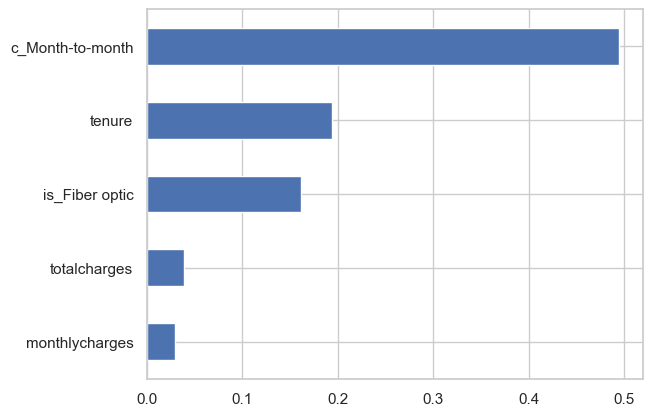

In [94]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5)[::-1].plot(kind='barh')

In [35]:
def tree_graph_to_png(tree, feature_names, png_file_to_save): 
    tree_str = export_graphviz(
        tree, 
        feature_names= feature_names,
        filled=True,
        out_file=None
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

In [36]:
tree_graph_to_png(
    tree=tree_grid.best_estimator_,
    feature_names = ml_df.columns,
    png_file_to_save = "decision_tree.png" 
)

In [145]:
k_values = [i for i in range (1, 60)]
scores = []

scaler = StandardScaler()

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, ml_df, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

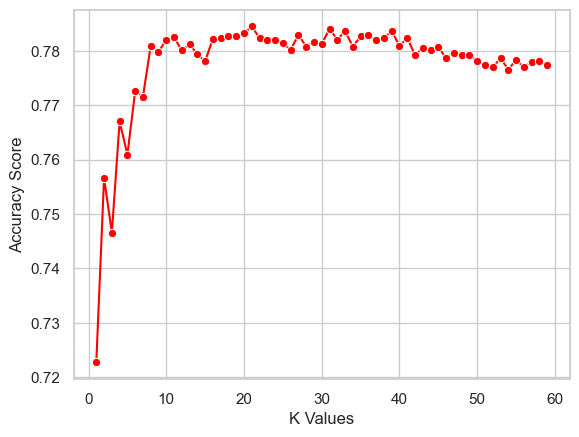

In [146]:
sns.lineplot(x = k_values, y = scores, marker = 'o', color='red')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [147]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [98]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7823000473260767
Precision: 0.6256983240223464
Recall: 0.4072727272727273


In [ ]:
# draw the feature importances barplot for knn 


In [84]:
from sklearn.inspection import permutation_importance

# calculate feature importances using permutation importance
result = permutation_importance(knn, X_holdout_scaled, y_test)

# get the feature importances and their names
feature_importances = result.importances_mean
feature_names = ml_df.columns

# create a dataframe with feature importances
df_feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# sort the dataframe by feature importance in descending order
df_feature_importances = df_feature_importances.sort_values('importance', ascending=False)

# print the top 5 features by importance
print(df_feature_importances.head(5))


c:\Users\nzund\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 38 features, but KNeighborsClassifier is expecting 36 features as input.

### 3.2 Clustering

In [42]:
cluster_df = pd.DataFrame()
cluster_df = original_df.copy()

In [43]:
cluster_df.drop(["customerid"], axis=1, inplace=True)

In [44]:
cluster_df.totalcharges = pd.to_numeric(cluster_df.totalcharges, errors='coerce')
cluster_df.totalcharges.fillna(cluster_df.totalcharges.mean(), inplace=True)




In [45]:
cluster_df.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [46]:
for column in cluster_df.select_dtypes(include=['object']).columns:
    cluster_df[column] = pd.factorize(cluster_df[column])[0]

In [47]:
cluster_df.dtypes

gender                int64
seniorcitizen         int64
partner               int64
dependents            int64
tenure                int64
phoneservice          int64
multiplelines         int64
internetservice       int64
onlinesecurity        int64
onlinebackup          int64
deviceprotection      int64
techsupport           int64
streamingtv           int64
streamingmovies       int64
contract              int64
paperlessbilling      int64
paymentmethod         int64
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

#### 3.2.1 Generate Decision Tree
Will assist with knowing which features contribute to Churn

After taking a look at the generated tree visualization `clustering_decision_tree.png`, the features used to make decisions are:
- techsupport
- tenure
- internetservice
- paperlessbilling
- contract
- dependents
- monthlycharges

In [48]:
y = cluster_df["churn"]
cluster_df.drop(["churn"], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(
    cluster_df.values, y, test_size=0.3, random_state=17
)

tree = DecisionTreeClassifier()



In [49]:
tree_params = {"max_depth": range(1, 100), "max_features": range(5, 50)}

tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4455 candidates, totalling 22275 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 100),
                         'max_features': range(5, 50)},
             verbose=True)

In [50]:
tree_graph_to_png(
    tree=tree_grid.best_estimator_,
    feature_names = cluster_df.columns,
    png_file_to_save = "clustering_decision_tree_1.png"
)

In [51]:
tree_grid.best_params_

{'max_depth': 4, 'max_features': 9}

#### Elbow Plot


In [ ]:
## KMeans Cluster of dataset 

from sklearn.cluster import KMeans

clusters = []
X = ml_df

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(2, 6000000000), xytext=(1.5, 1000000000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(3, 3000000000), xytext=(3, 4000000000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

c:\Users\nzund\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\nzund\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\nzund\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\nzund\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

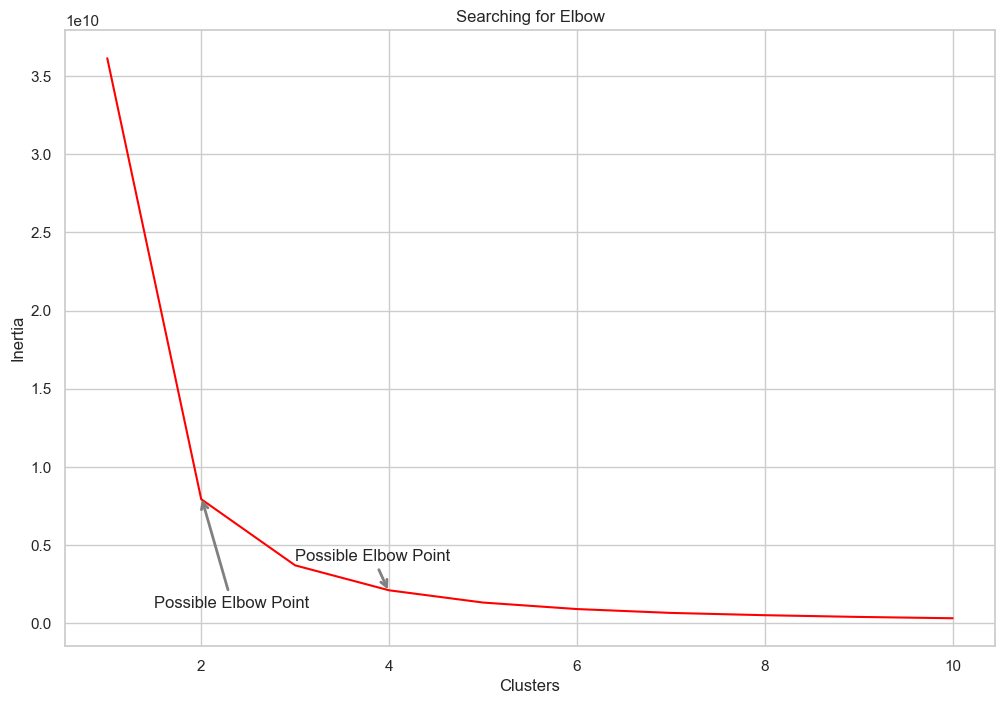

In [144]:
from sklearn.cluster import KMeans

clusters = []
X = ml_df

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax, color='red')
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(2, 8100000000), xytext=(1.5, 1000000000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='grey', lw=2))

ax.annotate('Possible Elbow Point', xy=(4, 2000000000), xytext=(3, 4000000000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='grey', lw=2))

plt.show()

### Hierarchical Clustering

C:\Users\nzund\AppData\Local\Temp\ipykernel_14008\9096613.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = linkage(dm, method='average')


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [70.0, 70.0, 92.5, 92.5],
  [115.0, 115.0, 125.0, 125.0],
  [81.25, 81.25, 120.0, 120.0],
  [50.0, 50.0, 100.625, 100.625],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [75.3125, 75.3125, 143.75, 143.75],
  [13.75, 13.75, 109.53125, 109.53125],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [192.5, 192.5, 220.0, 220.0],
  [175.0, 175.0, 206.25, 206.25],
  [235.0, 235.0, 245.0, 245.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [240.0, 240.0, 263.75, 263.75],
  [190.625, 190.625, 251.875, 251.875],
  [61.640625, 61.640625, 221.25, 221.25],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [345.0, 345.0, 355.0

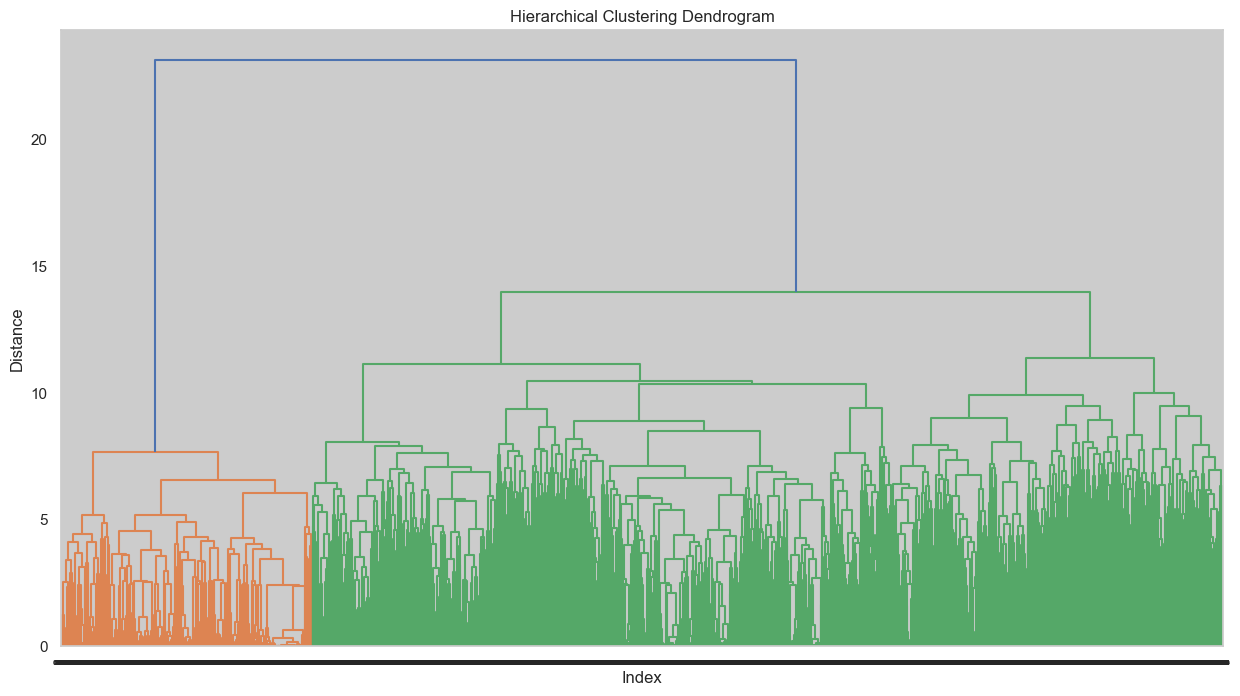

In [212]:
import gower
from scipy.cluster.hierarchy import linkage, fcluster
import scipy.cluster.hierarchy as sch 
new_df = df.copy()

new_df.drop(['churn','customerid','gender','paperlessbilling','onlinebackup'], axis=1, inplace=True)



dm = gower.gower_matrix(new_df)
z = linkage(dm, method='average')
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation = 0,  leaf_font_size = 5 ) 

In [140]:
tele_clust_df = df.copy()

tele_clust = fcluster(z, 4, criterion='maxclust')
new_df.groupby(tele_clust).mean(numeric_only=True)



,seniorcitizen,partner,dependents,tenure,phoneservice,monthlycharges,totalcharges,ml_No,ml_No phone service,ml_Yes,...,sm_No,sm_No internet service,sm_Yes,c_Month-to-month,c_One year,c_Two year,pm_Bank transfer (automatic),pm_Credit card (automatic),pm_Electronic check,pm_Mailed check
1,0.034076,0.483617,0.421363,30.547182,1.000000,21.079194,671.582374,0.775885,0.000000,0.224115,...,0.000000,1.0,0.000000,0.343381,0.238532,0.418087,0.217562,0.216907,0.079948,0.485583
2,0.127875,0.761730,0.445262,59.517019,0.834407,86.731279,5267.099081,0.236431,0.165593,0.597976,...,0.184913,0.0,0.815087,0.022999,0.305428,0.671573,0.326587,0.399264,0.156394,0.117755
3,0.278186,0.528799,0.227941,37.012255,1.000000,94.220312,3519.274786,0.199142,0.000000,0.800858,...,0.235907,0.0,0.764093,0.645221,0.245098,0.109681,0.227328,0.184436,0.533088,0.055147
4,0.177627,0.347748,0.218370,20.112938,0.820586,62.868227,1282.221998,0.580415,0.179414,0.240172,...,0.785919,0.0,0.214081,0.812366,0.134739,0.052895,0.173695,0.162974,0.429950,0.233381


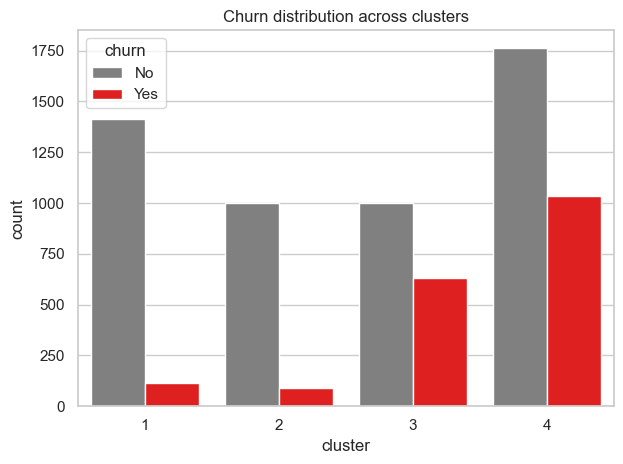

In [143]:

sns.set(style='whitegrid')
df['cluster'] = fcluster(z, 4, criterion='maxclust')
custom_palette = ['grey', 'red']
sns.countplot(data=df, x='cluster', hue='churn', palette=custom_palette)
plt.title('Churn distribution across clusters')
plt.tight_layout()
plt.show()

##### Cluster 1
Consists of customers who have been using the service for about 2 years 6 months, whose monthly charges have been lowest among the clusters around $21, and who've mainly

mainly use single lines
used phone service
no internet service
mostly paid via mailed check (0.48)


##### Cluster 2
Consists of customers who have been using the service for about 4 years and 8 months, whose monthly charges have the highest at $86

* partners
* 2-year contract
* Online Security
* Device protection
* Tech support
* mainly use automatic payment (bank transfer and credit card)
* stream movies & tv
* most use dsl
* most had online security

##### Cluster 3
Consists of customers who have been using the service for about 3 years,  months, whose monthly charges have been highest at $94


* electronic payment methods -> mostly electronic check
* month-to-month contract
* most use fiber-optic
* streaming movies & tv
* Multiple lines

##### Cluster 4
Consists of customers who have been using the service for about 1 year 6 months, whose monthly charges have been averaged at $62
* Month-to-month contract
* Least streaming for tv & movie
* dsl
* No device protection

#### Conclusion
Cluster 1: long tenure, low monthly pay, used very few services
Cluster 2: long tenure, high monthly pay, used almost all of the services 
Cluster 3: short tenure, high monthly pay, half of the services used
Cluster 4: short tenure, mid-monthly pay, very few services used



### Model Retraining with Clusters

Text(0, 0.5, 'Accuracy Score')

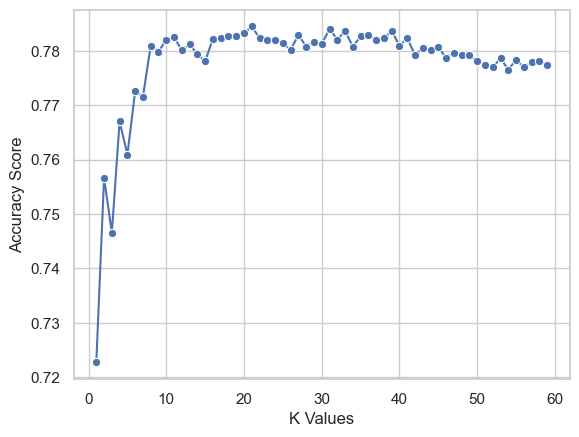

In [75]:
# testing knn 
new_df['cluster'] = fcluster(z, 4, criterion='maxclust')

X_train, X_test, y_train, y_test = train_test_split(
    new_df, y, test_size=0.3, random_state=1234
)

k_values = [i for i in range (1, 60)]
scores = []

scaler = StandardScaler()

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, ml_df, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [76]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [77]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7823000473260767
Precision: 0.6256983240223464
Recall: 0.4072727272727273


In [ ]:
Accuracy: 0.7813535257927118
Precision: 0.6229050279329609
Recall: 0.40545454545454546